<h2>9축센서 기반의 충돌감지 알고리즘 분석자료</h2>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from scipy import stats
import math

In [2]:
plt.rcParams["figure.figsize"] = (8,4)

<h3>9축 데이터 파일 읽기</h3>

In [3]:
file_path = 'D:/Data/log.csv'
data = pd.read_csv(file_path, engine='python')

In [4]:
data.head()

,MeasuringCycle,CallCycle,Weak,Strong,Total
0,5,10,165,54,219
1,10,10,165,54,219
2,20,10,0,0,0
3,40,10,0,0,0
4,50,10,0,0,0


<br>
<h3>9축 데이터 측정 주기 및 알고리즘 호출 주기에 따른 그룹화</h3>
<hr>

- 10ms 간격의 9축 데이터 측정 주기 결과와 1,000ms 간격의 알고리즘 호출 주기 결과 그룹화

In [5]:
measuringCycle = data[data['MeasuringCycle'] == 10]

In [6]:
callCycle = data[data['CallCycle'] == 1000]

<br>
<h3>충돌감지 알고리즘 호출 주기에 따른 충돌 감지 정확도 평가</h3>
<hr>

In [7]:
value_a = []
value_b = []

for i in range(len(measuringCycle)):
    value_a.append(measuringCycle.iloc[i]['Weak'])
    value_b.append(measuringCycle.iloc[i]['Strong'])

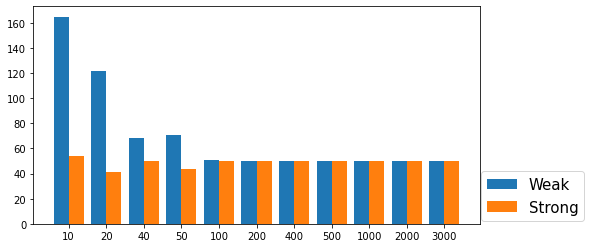

In [8]:
topics = ['10', '20', '40', '50', '100', '200', '400', '500', '1000', '2000', '3000']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 11)
value_b_x = create_x(2, 0.8, 2, 11)

ax = plt.subplot()
ax.bar(value_a_x, value_a, label='Weak')
ax.bar(value_b_x, value_b, label='Strong')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.251, -0.021))

plt.show()

<br>
<h3>9축 데이터 측정 주기에 따른 충돌 감지 정확도 평가</h3>
<hr>

In [9]:
value_a = []
value_b = []

for i in range(len(callCycle)):
    value_a.append(callCycle.iloc[i]['Weak'])
    value_b.append(callCycle.iloc[i]['Strong'])

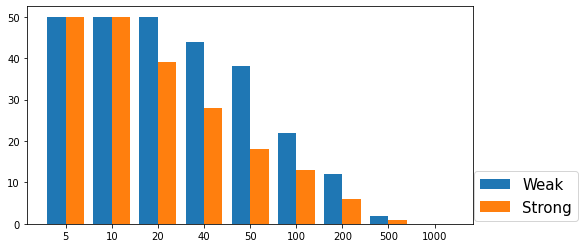

In [10]:
topics = ['5', '10', '20', '40', '50', '100', '200', '500', '1000']

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 9)
value_b_x = create_x(2, 0.8, 2, 9)

ax = plt.subplot()
ax.bar(value_a_x, value_a, label='Weak')
ax.bar(value_b_x, value_b, label='Strong')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)

plt.legend(loc='lower right', fontsize=15, bbox_to_anchor=(1.251, -0.021))

plt.show()